In [1]:
import pandas as pd
import numpy as np
import matplotlib as mt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("F:\study\Data Mining\Diabetes\diabetes.csv")

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.shape

(768, 9)

In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

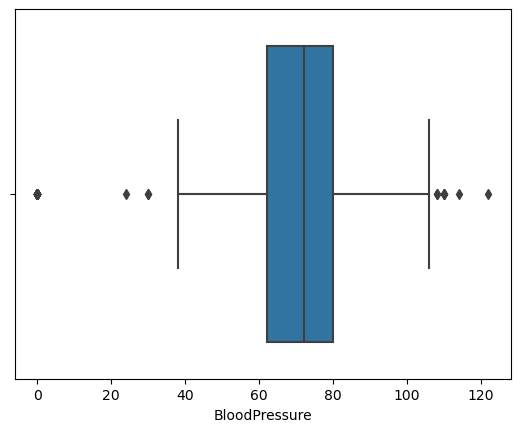

In [10]:
gfg = sns.boxplot(x="BloodPressure",data=df)

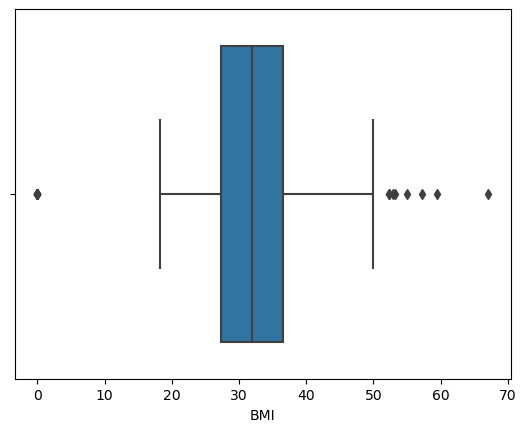

In [11]:
gfg = sns.boxplot(x="BMI",data=df)

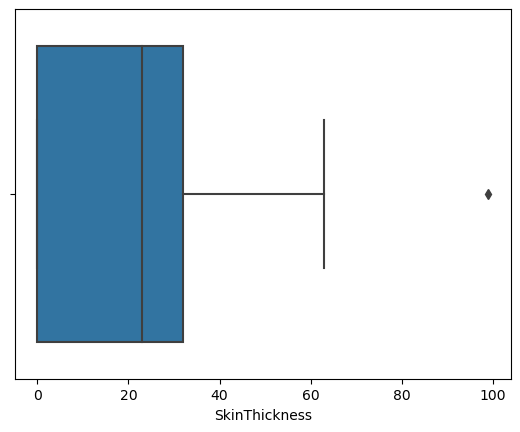

In [12]:
gfg = sns.boxplot(x="SkinThickness",data=df)

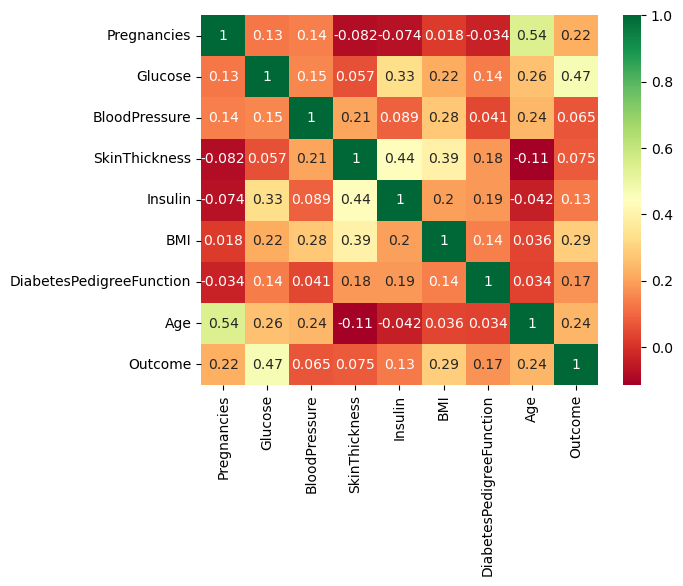

In [13]:
cormat = df.corr()
top_corr_features = cormat.index
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

In [14]:
#Preprocessing (handling missing data)
df_OutCome=df['Outcome']
df_Pregnancies=df["Pregnancies"]
df = df.iloc[:,1:8].replace(0, np.nan)
df=df.dropna()
df.head()
df_OutCome=pd.DataFrame(df_OutCome)
df_Pregnancies=pd.DataFrame(df_Pregnancies)

In [15]:
df.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3      89.0           66.0           23.0     94.0  28.1   
4     137.0           40.0           35.0    168.0  43.1   
6      78.0           50.0           32.0     88.0  31.0   
8     197.0           70.0           45.0    543.0  30.5   
13    189.0           60.0           23.0    846.0  30.1   

    DiabetesPedigreeFunction  Age  
3                      0.167   21  
4                      2.288   33  
6                      0.248   26  
8                      0.158   53  
13                     0.398   59

In [16]:
df_Tot = pd.concat([ df_Pregnancies, df,df_OutCome] ,axis=1)
df=df_Tot.dropna()
df.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1     89.0           66.0           23.0     94.0  28.1   
4             0    137.0           40.0           35.0    168.0  43.1   
6             3     78.0           50.0           32.0     88.0  31.0   
8             2    197.0           70.0           45.0    543.0  30.5   
13            1    189.0           60.0           23.0    846.0  30.1   
14            5    166.0           72.0           19.0    175.0  25.8   
16            0    118.0           84.0           47.0    230.0  45.8   
18            1    103.0           30.0           38.0     83.0  43.3   
19            1    115.0           70.0           30.0     96.0  34.6   
20            3    126.0           88.0           41.0    235.0  39.3   
24           11    143.0           94.0           33.0    146.0  36.6   
25           10    125.0           70.0           26.0    115.0  31.1   
27            1     97.0           66.0           15.0    140.0  23.2   
28           13    145.0           82.0           19.0    110.0  22.2   
31            3    158.0           76.0           36.0    245.0  31.6   
32            3     88.0           58.0           11.0     54.0  24.8   
35            4    103.0           60.0           33.0    192.0  24.0   
39            4    111.0           72.0           47.0    207.0  37.1   
40            3    180.0           64.0           25.0     70.0  34.0   
43            9    171.0          110.0           24.0    240.0  45.4   

    DiabetesPedigreeFunction   Age  Outcome  
3                      0.167  21.0        0  
4                      2.288  33.0        1  
6                      0.248  26.0        1  
8                      0.158  53.0        1  
13                     0.398  59.0        1  
14                     0.587  51.0        1  
16                     0.551  31.0        1  
18                     0.183  33.0        0  
19                     0.529  32.0        1  
20                     0.704  27.0        0  
24                     0.254  51.0        1  
25                     0.205  41.0        1  
27                     0.487  22.0        0  
28                     0.245  57.0        0  
31                     0.851  28.0        1  
32                     0.267  22.0        0  
35                     0.966  33.0        0  
39                     1.390  56.0        1  
40                     0.271  26.0        0  
43                     0.721  54.0        1

In [17]:
df = df.reset_index(drop=True)
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1     89.0           66.0           23.0     94.0  28.1   
1            0    137.0           40.0           35.0    168.0  43.1   
2            3     78.0           50.0           32.0     88.0  31.0   
3            2    197.0           70.0           45.0    543.0  30.5   
4            1    189.0           60.0           23.0    846.0  30.1   
5            5    166.0           72.0           19.0    175.0  25.8   
6            0    118.0           84.0           47.0    230.0  45.8   
7            1    103.0           30.0           38.0     83.0  43.3   
8            1    115.0           70.0           30.0     96.0  34.6   
9            3    126.0           88.0           41.0    235.0  39.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.167  21.0        0  
1                     2.288  33.0        1  
2                     0.248  26.0        1  
3                     0.158  53.0        1  
4                     0.398  59.0        1  
5                     0.587  51.0        1  
6                     0.551  31.0        1  
7                     0.183  33.0        0  
8                     0.529  32.0        1  
9                     0.704  27.0        0

In [18]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  392.000000                392.000000  392.000000  392.000000  
mean    33.086224                  0.523046   30.864796    0.331633  
std      7.027659                  0.345488   10.200777    0.471401  
min     18.200000                  0.085000   21.000000    0.000000  
25%     28.400000                  0.269750   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.100000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

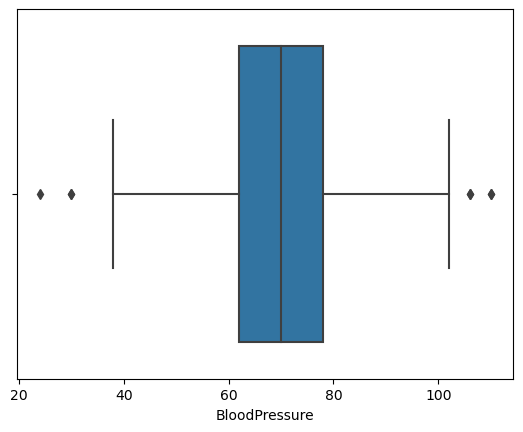

In [19]:
gfg = sns.boxplot(x="BloodPressure",data=df)

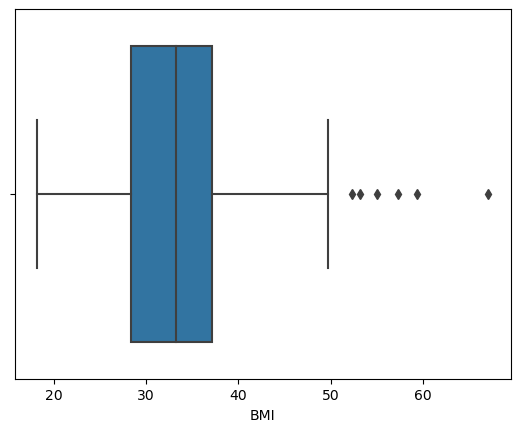

In [20]:
gfg = sns.boxplot(x="BMI",data=df)

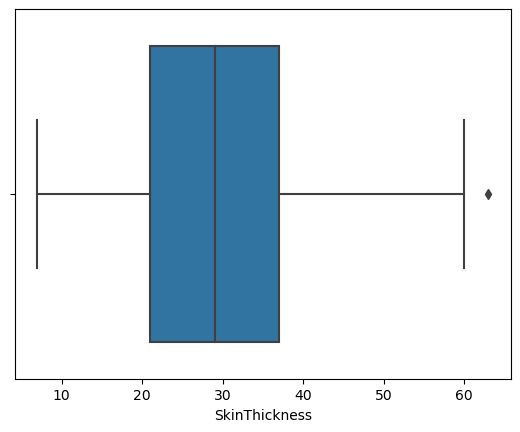

In [21]:
gfg = sns.boxplot(x="SkinThickness",data=df)

In [22]:
fig = px.histogram(df, x="Pregnancies", y=df['Outcome'])
fig.show()

In [23]:
fig = px.pie(df,values= 'Outcome',names='Pregnancies', title='Pregnancies with outcome')
fig.show()

In [24]:
fig = px.histogram(df, x="Glucose", y=df['Outcome'])
fig.show()

In [25]:
fig = px.histogram(df, x="BloodPressure", y=df['Outcome'])
fig.show()

In [26]:
fig = px.histogram(df, x="SkinThickness", y=df['Outcome'])
fig.show()

In [27]:
fig = px.histogram(df, x="Insulin", y=df['Outcome'])
fig.show()

In [28]:
fig = px.histogram(df, x="BMI", y=df['Outcome'])
fig.show()

In [29]:
fig = px.histogram(df, x="DiabetesPedigreeFunction", y=df['Outcome'])
fig.show()

In [30]:
fig = px.histogram(df, x="Age", y=df['Outcome'])
fig.show()

In [31]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.198291       0.213355       0.093209   
Glucose                      0.198291  1.000000       0.210027       0.198856   
BloodPressure                0.213355  0.210027       1.000000       0.232571   
SkinThickness                0.093209  0.198856       0.232571       1.000000   
Insulin                      0.078984  0.581223       0.098512       0.182199   
BMI                         -0.025347  0.209516       0.304403       0.664355   
DiabetesPedigreeFunction     0.007562  0.140180      -0.015971       0.160499   
Age                          0.679608  0.343641       0.300039       0.167761   
Outcome                      0.256566  0.515703       0.192673       0.255936   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.078984 -0.025347                  0.007562   
Glucose                   0.581223  0.209516                  0.140180   
BloodPressure             0.098512  0.304403                 -0.015971   
SkinThickness             0.182199  0.664355                  0.160499   
Insulin                   1.000000  0.226397                  0.135906   
BMI                       0.226397  1.000000                  0.158771   
DiabetesPedigreeFunction  0.135906  0.158771                  1.000000   
Age                       0.217082  0.069814                  0.085029   
Outcome                   0.301429  0.270118                  0.209330   

                               Age   Outcome  
Pregnancies               0.679608  0.256566  
Glucose                   0.343641  0.515703  
BloodPressure             0.300039  0.192673  
SkinThickness             0.167761  0.255936  
Insulin                   0.217082  0.301429  
BMI                       0.069814  0.270118  
DiabetesPedigreeFunction  0.085029  0.209330  
Age                       1.000000  0.350804  
Outcome                   0.350804  1.000000

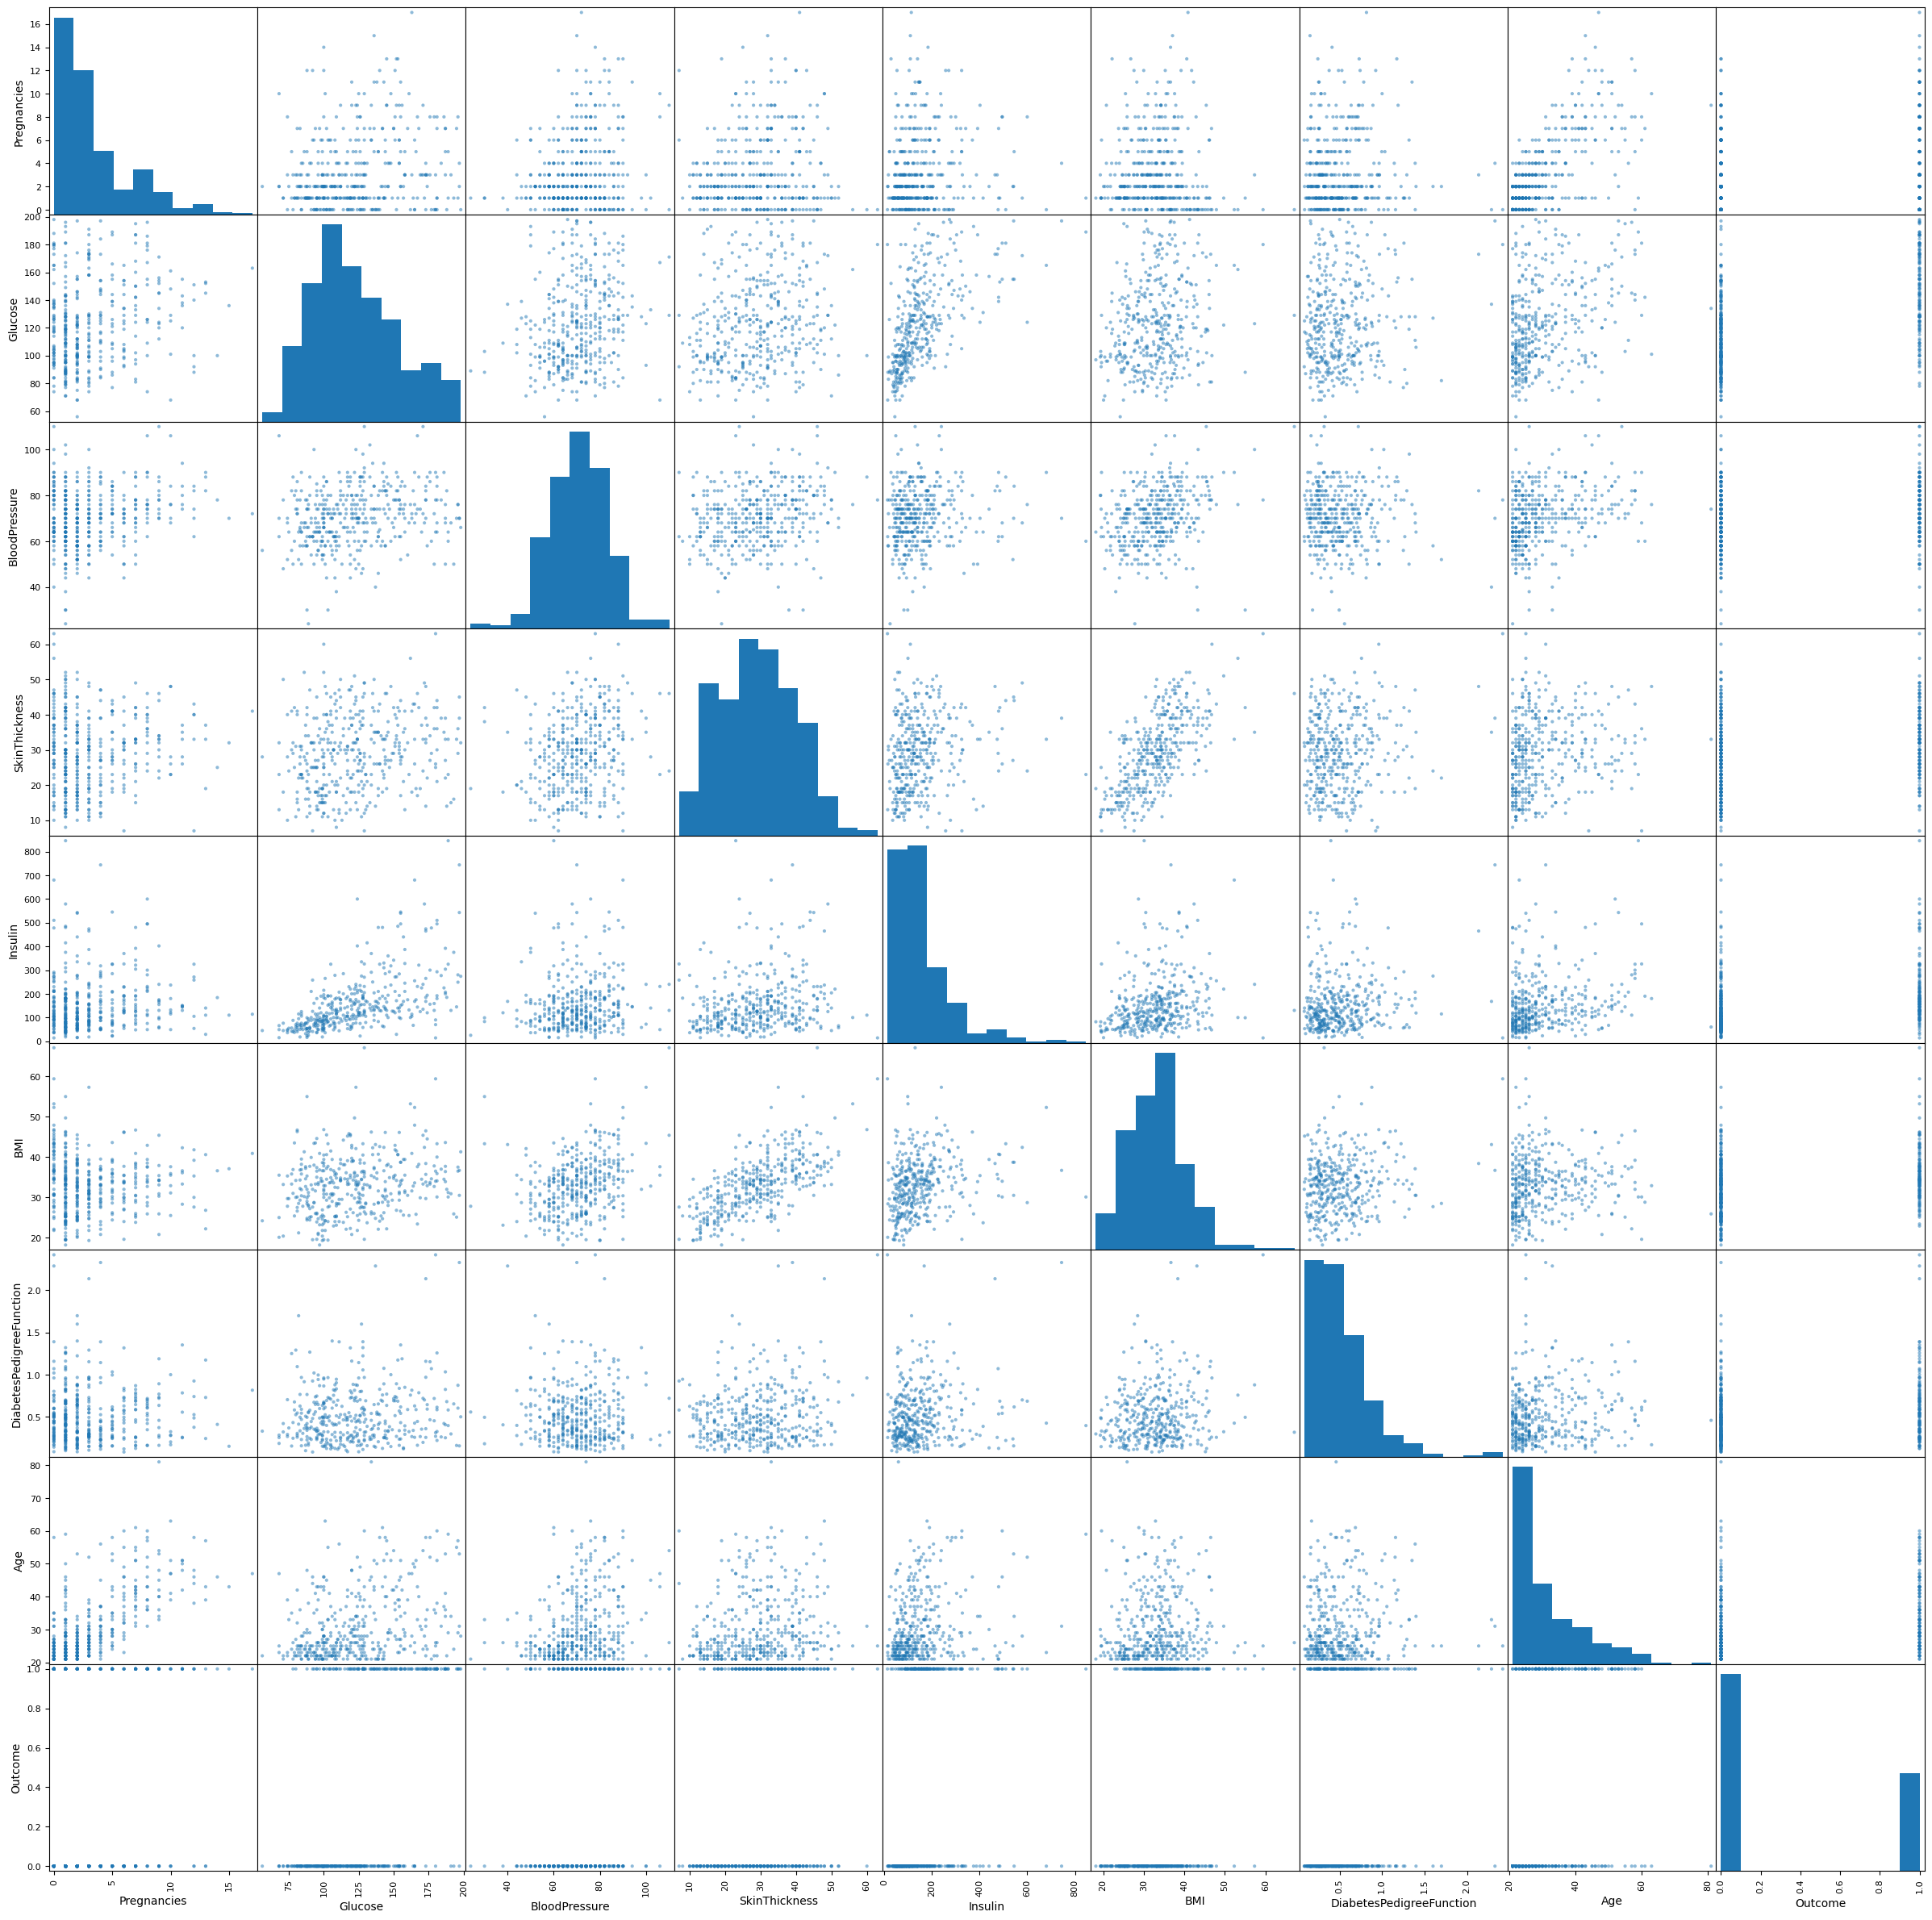

In [32]:
p=scatter_matrix(df,figsize=(30, 30))

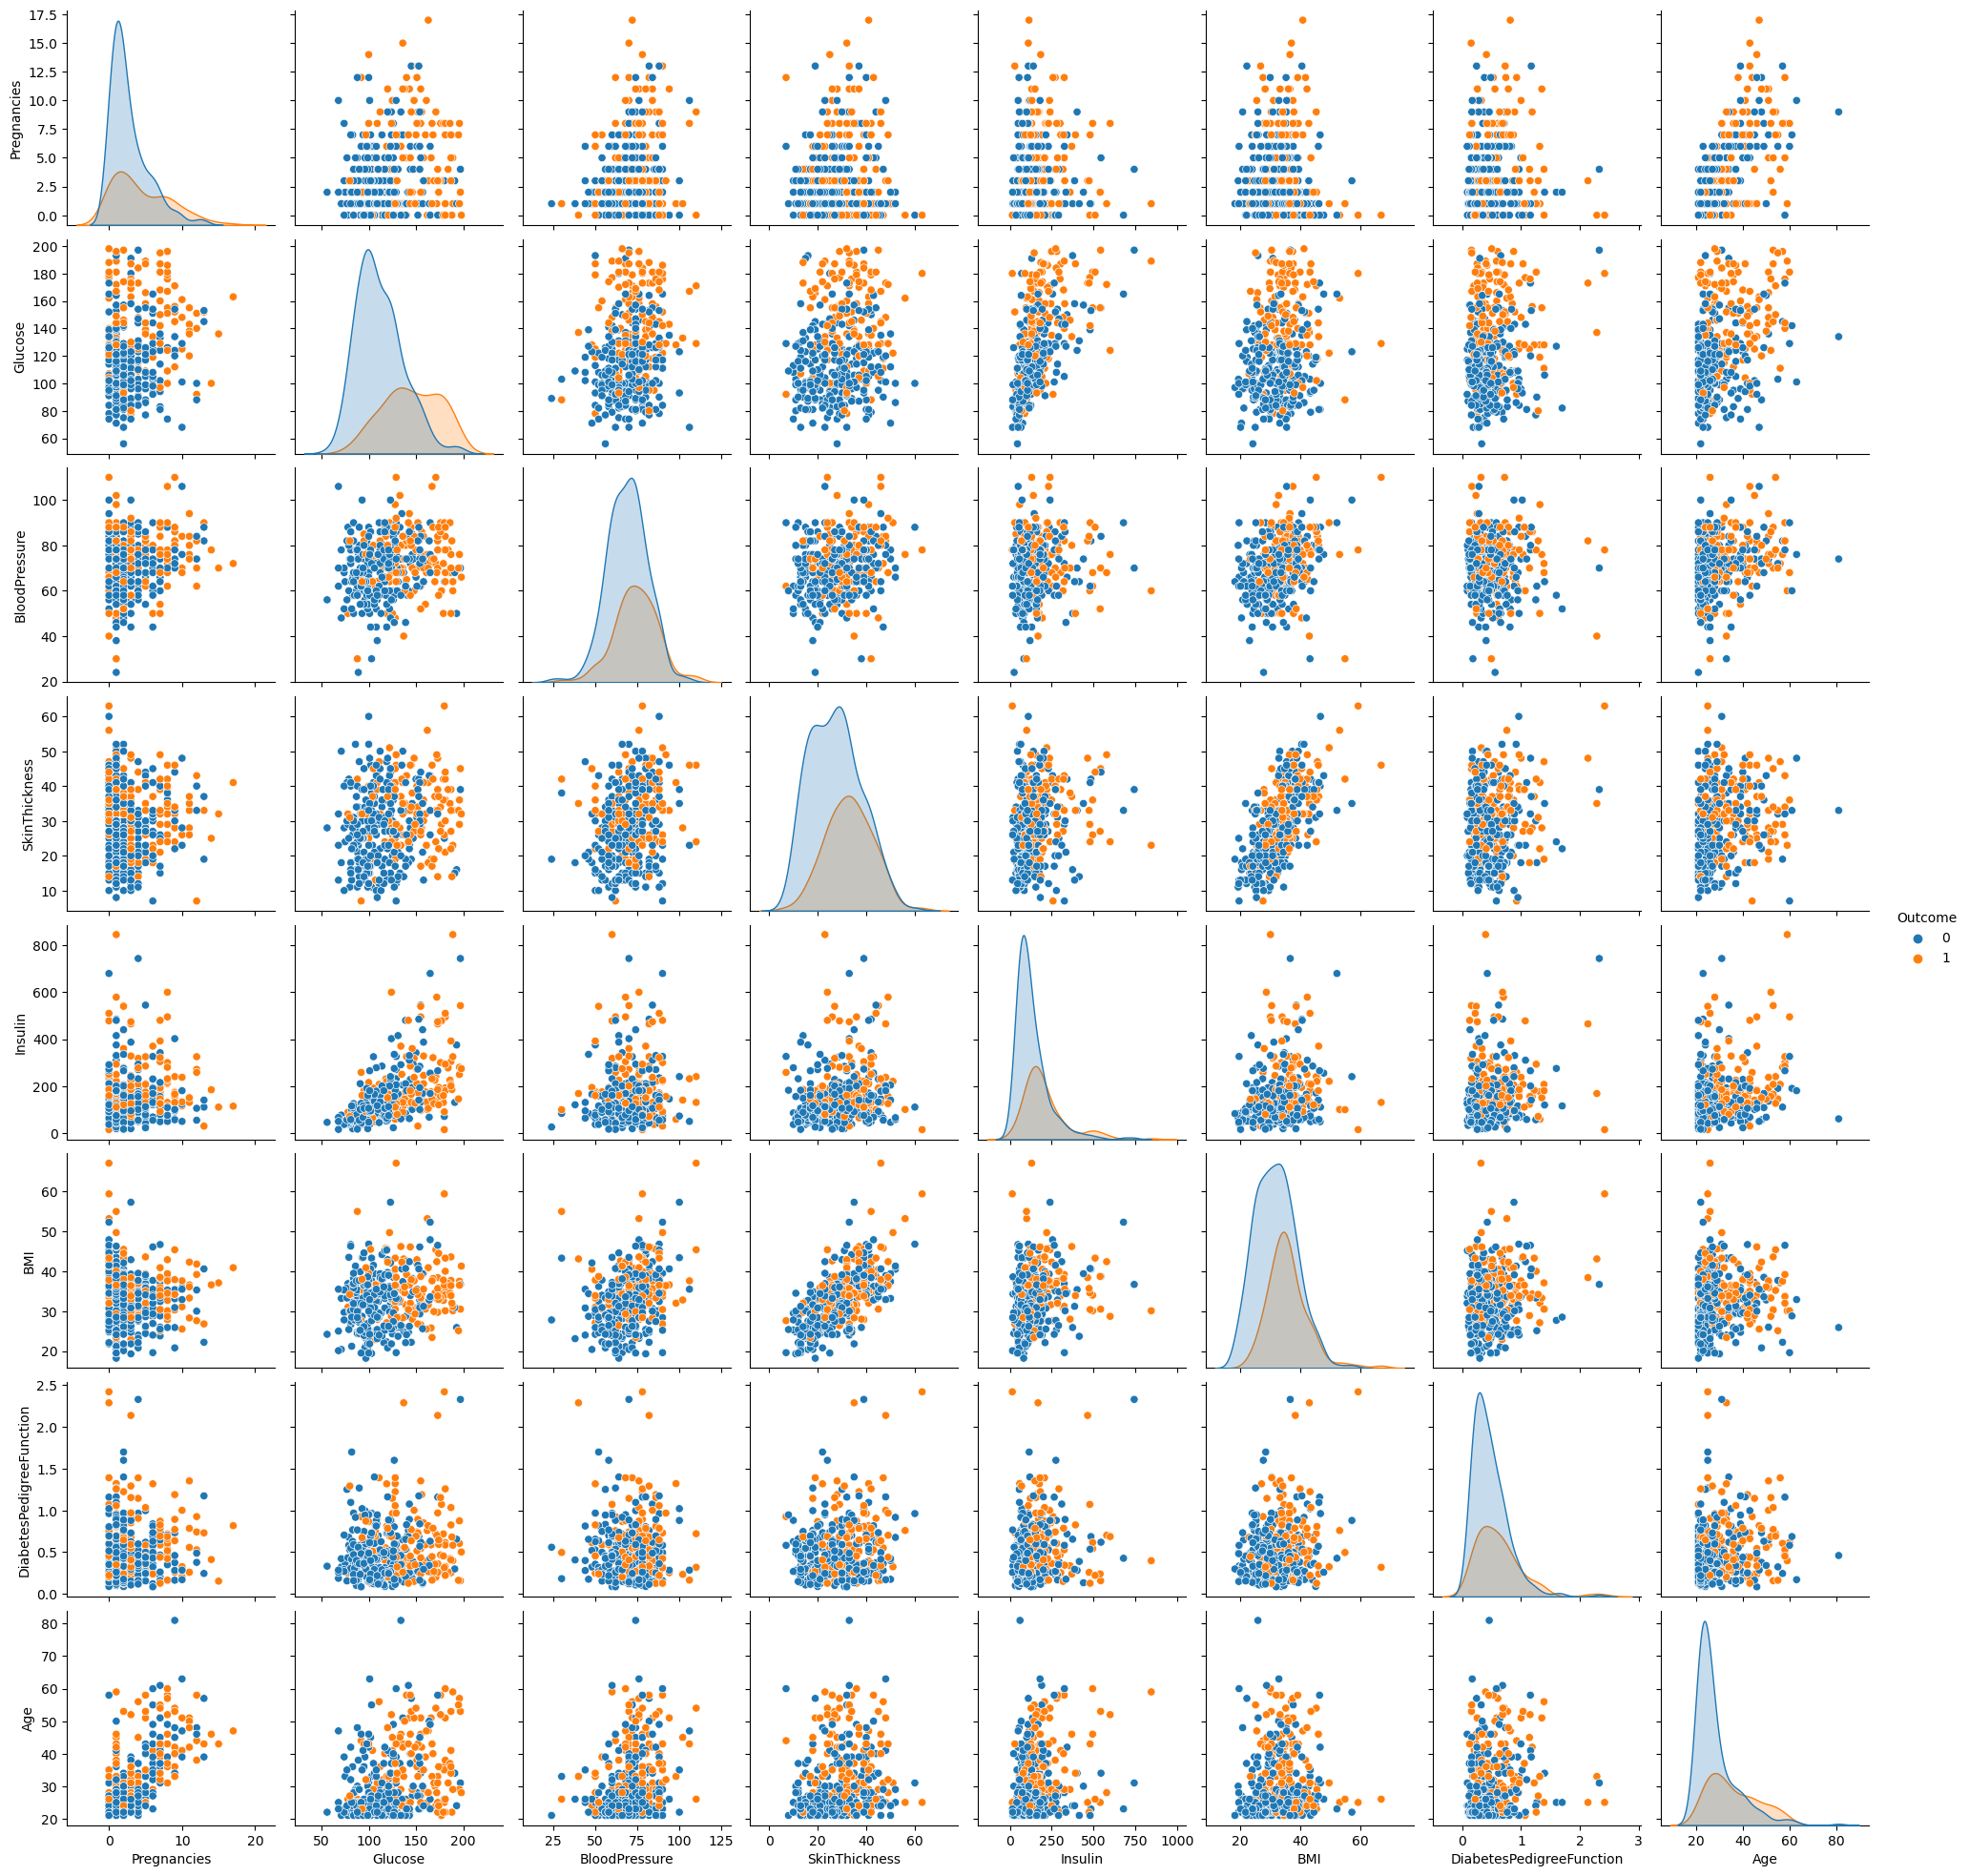

In [33]:
p=sns.pairplot(df, hue = 'Outcome')

In [34]:
cormat = df.corr()

In [35]:
top_corr_features = cormat.index

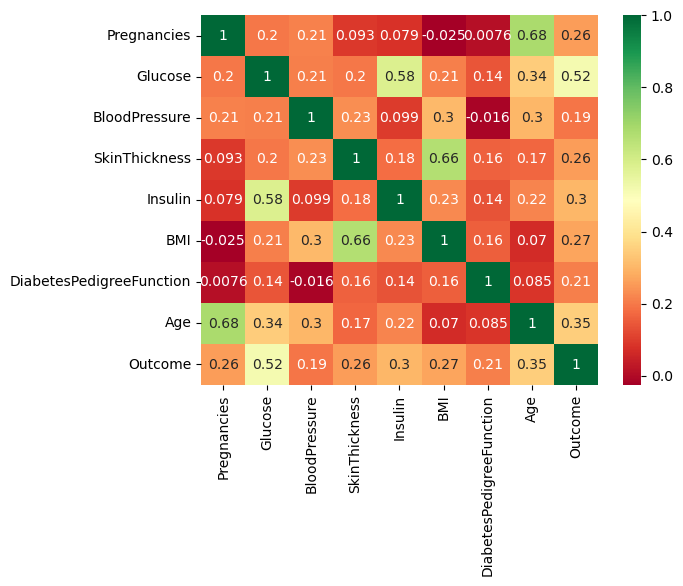

In [36]:
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

<AxesSubplot:xlabel='Insulin', ylabel='Age'>

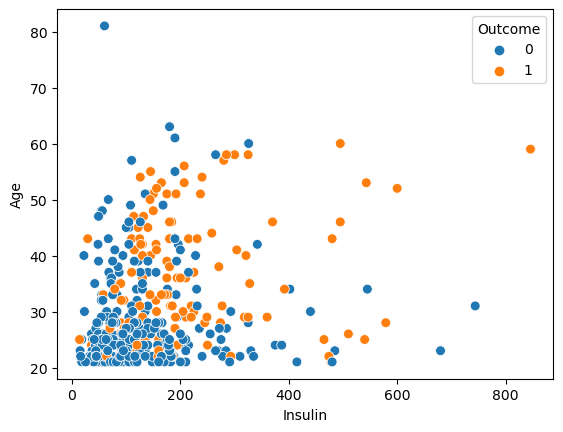

In [37]:
sns.scatterplot(data=df, x="Insulin", y="Age",hue="Outcome", s=50)

In [38]:
#Preprocessing (Data scaling and normalization)
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = df.columns
d = scaler.fit_transform(df.iloc[:,0:8])
scaled_df = pd.DataFrame(d)

In [39]:
scaled_df.head()

0         1         2         3         4         5         6  \
0  0.058824  0.232394  0.488372  0.285714  0.096154  0.202454  0.035118   
1  0.000000  0.570423  0.186047  0.500000  0.185096  0.509202  0.943469   
2  0.176471  0.154930  0.302326  0.446429  0.088942  0.261759  0.069807   
3  0.117647  0.992958  0.534884  0.678571  0.635817  0.251534  0.031263   
4  0.058824  0.936620  0.418605  0.285714  1.000000  0.243354  0.134047   

          7  
0  0.000000  
1  0.200000  
2  0.083333  
3  0.533333  
4  0.633333

In [40]:
df_outcome=df.Outcome
df_outcome_final=pd.DataFrame(df_outcome)
df_Final = pd.concat([ scaled_df, df_outcome_final] ,axis=1)
df_Final.columns=df.columns

In [41]:
df_Final.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.232394       0.488372       0.285714  0.096154  0.202454   
1     0.000000  0.570423       0.186047       0.500000  0.185096  0.509202   
2     0.176471  0.154930       0.302326       0.446429  0.088942  0.261759   
3     0.117647  0.992958       0.534884       0.678571  0.635817  0.251534   
4     0.058824  0.936620       0.418605       0.285714  1.000000  0.243354   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.035118  0.000000        0  
1                  0.943469  0.200000        1  
2                  0.069807  0.083333        1  
3                  0.031263  0.533333        1  
4                  0.134047  0.633333        1

In [42]:
#spliting data to train and test sets
x = df_Final.iloc[:,0:8]
y = df_Final.iloc[:,8:9]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [43]:
# Create an instance of Naive bayes Classifier
naive = GaussianNB()
# Fit the model
naive.fit(x_train, y_train)
# Measure model performance
y_probas = naive.predict_proba(x_test)
y_pred = naive.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

Accuracy: 0.797468


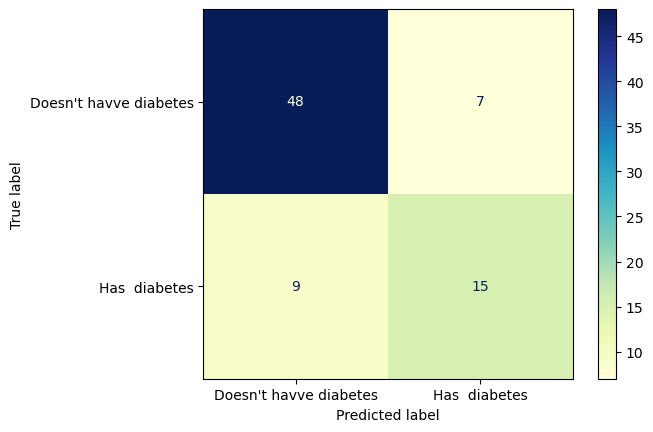

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(naive,x_test,y_test,values_format='d',display_labels=["Doesn't have diabetes","Has  diabetes"], cmap="YlGnBu")

In [45]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        57
           1       0.62      0.68      0.65        22

    accuracy                           0.80        79
   macro avg       0.75      0.76      0.75        79
weighted avg       0.80      0.80      0.80        79



In [46]:
# Create an instance of Random Forest Classifier
svc = SVC(kernel='linear')
# Fit the model
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [47]:
# Measure model performance
y_pred = svc.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

Accuracy: 0.797468


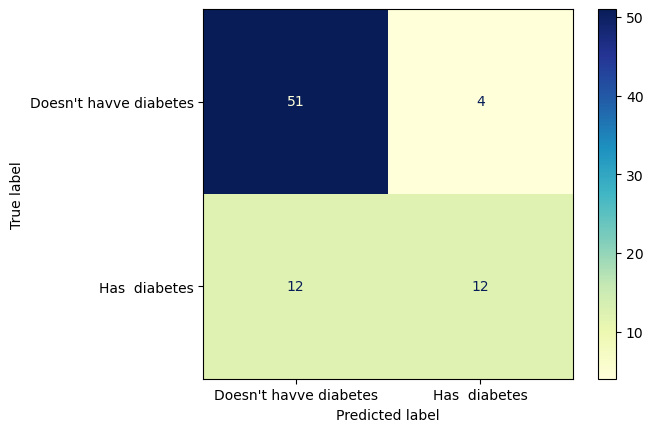

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test,y_test,values_format='d',display_labels=["Doesn't have diabetes","Has  diabetes"], cmap="YlGnBu")

In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        63
           1       0.50      0.75      0.60        16

    accuracy                           0.80        79
   macro avg       0.71      0.78      0.73        79
weighted avg       0.84      0.80      0.81        79



In [50]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

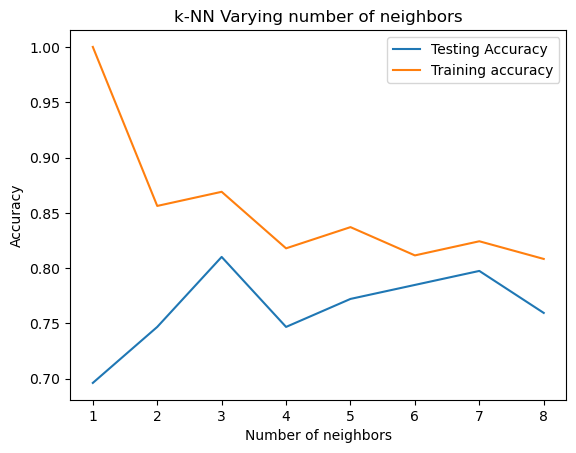

In [51]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [52]:
# Create an instance of KNN Classifier
knn= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p= 3) 
# Fit the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=3)

In [53]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

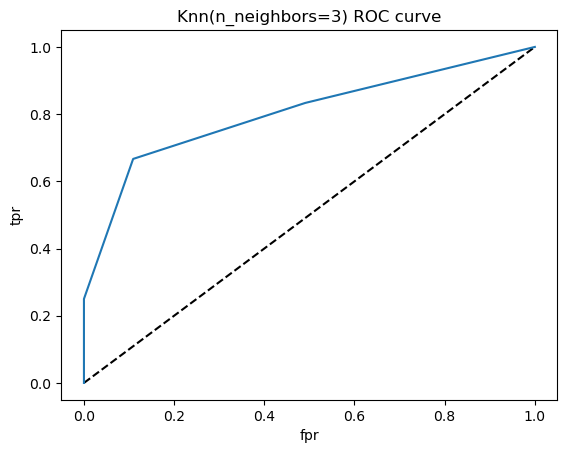

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [55]:
# Measure model performance
y_probas = knn.predict_proba(x_test)
y_pred = knn.predict(x_test)
score=accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

Accuracy: 0.822785


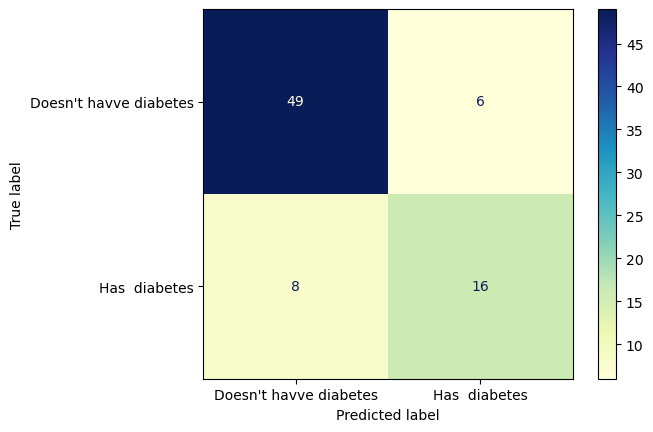

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,x_test,y_test,values_format='d',display_labels=["Doesn't have diabetes","Has  diabetes"], cmap="YlGnBu")

In [57]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        57
           1       0.67      0.73      0.70        22

    accuracy                           0.82        79
   macro avg       0.78      0.79      0.79        79
weighted avg       0.83      0.82      0.83        79



In [58]:
# Create an instance of Random Forest Classifier
forest = RandomForestClassifier(criterion='gini',random_state=3) #gini meagures impurity
# Fit the model
forest.fit(x_train, y_train)
# Measure model performance
y_probas = forest.predict_proba(x_test)
y_pred = forest.predict(x_test)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
score=accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))

Accuracy: 0.848101


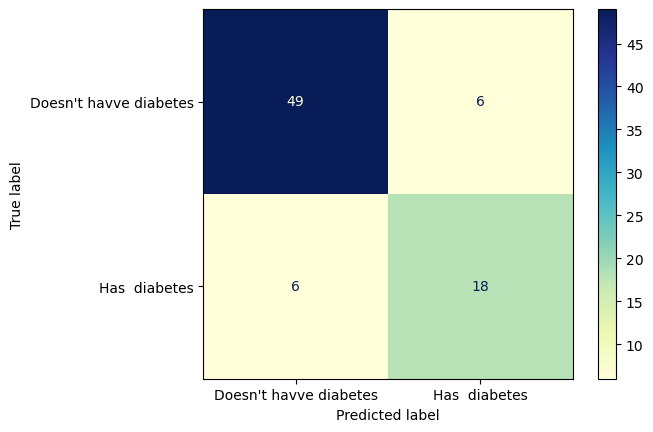

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(forest,x_test,y_test,values_format='d',display_labels=["Doesn't have diabetes","Has  diabetes"], cmap="YlGnBu")

In [60]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        55
           1       0.75      0.75      0.75        24

    accuracy                           0.85        79
   macro avg       0.82      0.82      0.82        79
weighted avg       0.85      0.85      0.85        79



In [61]:
import wandb 

In [62]:
wandb.login()

wandb: Currently logged in as: ahmedkhaled. Use `wandb login --relogin` to force relogin


True

In [63]:
feature_names =list(df.columns[:-1])
labels = list(df['Outcome'].unique())

In [64]:
run = wandb.init(project='Diabetes Classification prblem', name="naive")

In [65]:
wandb.sklearn.plot_classifier(naive, 
                              x_train, x_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              labels, 
                              is_binary=True, 
                              model_name='NaiveBayes')

wandb: 
wandb: Plotting NaiveBayes.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


In [66]:
run = wandb.init(project='Diabetes Classification prblem', name="SVC")

In [67]:
wandb.sklearn.plot_classifier(svc, 
                              x_train, x_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              labels, 
                              is_binary=True, 
                              model_name='NaiveBayes')

wandb: 
wandb: Plotting NaiveBayes.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


In [68]:
run = wandb.init(project='Diabetes Classification prblem', name="kNN")

In [69]:
wandb.sklearn.plot_classifier(knn, 
                              x_train, x_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              labels, 
                              is_binary=True, 
                              model_name='NearestNeighbors')

wandb: 
wandb: Plotting NearestNeighbors.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


In [70]:
run = wandb.init(project='Diabetes Classification prblem', name="forest")

In [71]:
wandb.sklearn.plot_classifier(forest, 
                              x_train, x_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              labels, 
                              is_binary=True, 
                              model_name='RandomForest')

wandb: 
wandb: Plotting RandomForest.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.
